In [3]:
import numpy as np
import pandas as pd

In [47]:
dff = pd.read_csv("data/train.csv")
dff_test = pd.read_csv("data/test.csv")

In [6]:
metadata = pd.read_csv("data/item_metadata.csv")

In [7]:
cols=["user_id","session_id","timestamp","step","action_type","reference","platform","city","device","current_filters","impressions","prices","interactions"]
df = pd.read_csv("data/train.groupby.csv", sep="\t", names=cols)
df_val = pd.read_csv("data/val.groupby.csv", sep="\t", names=cols)
df_test = pd.read_csv("data/test.groupby.csv", sep="\t", names=cols)

In [26]:
# interactions = []
for idx, row in df.iterrows():
#     imp.append(len(row['impressions'].split("|")))
    interaction = row['interactions'].split("|") if type(
                    row['interactions']) == str else []
    interactions.append(len(interaction))
    

In [91]:
clicks = dff[dff.action_type == "clickout item"]

In [124]:
clicks['label'] = click_dist

/Users/jarana/anaconda3/envs/recsys2019/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
price_dist = clicks['prices'].apply(lambda x : np.mean([int(i) for i in x.split("|")]))

In [131]:
clicks['price_mean'] = price_dist

/Users/jarana/anaconda3/envs/recsys2019/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [143]:
session_first_row = dff[dff.session_id.isin(clicks['session_id'])].groupby("session_id").first()

In [150]:
session_first_row['first_time'] = session_first_row['timestamp']

In [155]:
clicks = pd.merge(clicks, session_first_row['first_time'], on='session_id')

In [166]:
clicks['duration'] = (clicks['timestamp'] - clicks['first_time']).dt.total_seconds()

In [174]:
clicks['isFilter'] = clicks['current_filters'].isna() * 1
tmp = ["mobile", "desktop", "tablet"]
clicks['device'] = clicks['device'].apply(lambda x : tmp.index(x))

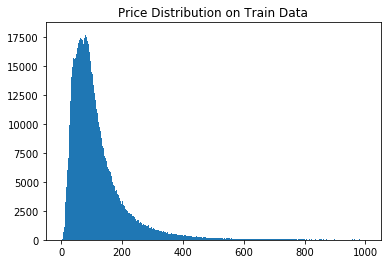

In [130]:
plt.hist(price_dist, bins='auto', range=(0,1000))  # arguments are passed to np.histogram
plt.title("Price Distribution on Train Data")
plt.show()

In [95]:
from tqdm.autonotebook import tqdm

click_dist = []
for idx, row in clicks.iterrows():
    rank = [int(i) for i in row['impressions'].split("|")]
    gtItem = int(row['reference'])
    if gtItem in rank:
        click_dist.append(rank.index(gtItem))
    else:
        click_dist.append(25)


/Users/jarana/anaconda3/envs/recsys2019/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


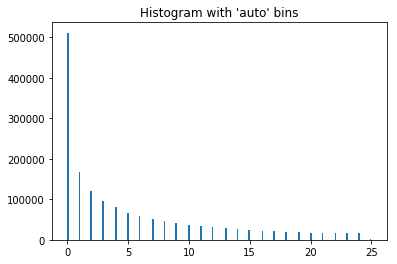

In [99]:
plt.hist(click_dist, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [43]:
dff["timestamp"] = pd.to_datetime(dff["timestamp"]) 

In [51]:
dff['timestamp'] = pd.to_datetime(dff['timestamp'],unit='s')

In [60]:
s = dff_test.groupby("session_id")

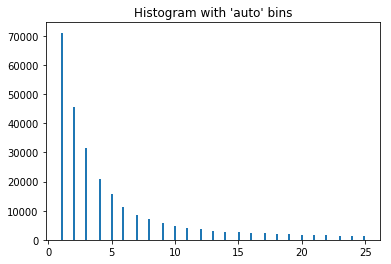

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
plt.hist(s.size().tolist(), bins='auto', range=(1,25))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [224]:
for i in dff.action_type.unique():
    print(i, dff[dff.action_type == i]['reference'].unique())

search for poi ['Newtown' 'Surry Hills' 'Covent Garden' ... 'Akrata Beach'
 'Castillo de Xátiva' 'Arenella beach']
interaction item image ['666856' '109038' '3377332' ... '1265311' '10218812' '4201464']
clickout item ['109038' '1257342' '2795374' ... '10218812' '2627868' '1771251']
interaction item info ['3377332' '3066244' '2795374' ... '2326002' '10218812' '4201464']
interaction item deals ['3066244' '10091602' '475256' ... '4834976' '10218812' '1627067']
search for destination ['London, United Kingdom' 'Bakersfield, USA' 'Panama City, Panama' ...
 'Zhuolan Township, Taiwan' 'Xiluo Township, Taiwan' 'Navoiy, Uzbekistan']
filter selection ['Very Good Rating' 'Hostal (ES)' 'Hotel' 'Motel' 'Resort' '4 Star'
 '5 Star' '3 Star' 'Best Value' 'Free WiFi (Combined)'
 'Breakfast Included' 'Sort by Price' 'Focus on Distance' 'Restaurant'
 'Excellent Rating' 'Pet Friendly' 'Air Conditioning' 'Car Park'
 'Jacuzzi (Hotel)' 'Kitchen' 'Good Rating' 'Sort By Distance'
 'Camping Site' 'House / Apartm

In [225]:
dff.action_type.nunique()

10

In [231]:
for idx, rows in clicks.groupby("city"):
    print(rows[['reference', 'current_filters', 'impressions']])
    

        reference   current_filters  \
404231    2010379               NaN   
952837      53248               NaN   
1343572   2725638  Hotel|Best Value   
1343573     53248  Hotel|Best Value   

                                               impressions  
404231   1263698|161159|1869739|5220864|2010379|2849286...  
952837   53248|161159|161149|136105|3379216|152664|9211...  
1343572  161159|7100892|152664|173207|161247|53684|2725...  
1343573  161159|7100892|152664|173207|161247|53684|2725...  
        reference     current_filters  \
84846      444516                 NaN   
104866     444516                 NaN   
110523     444516               Hotel   
110524    3989628               Hotel   
110829    3989628                 NaN   
182114    3876688                 NaN   
182115    3876688                 NaN   
182116    1707551                 NaN   
215852     444516                 NaN   
217259     163255                 NaN   
217260    5709840                 NaN   
239642 

KeyboardInterrupt: 

In [254]:
for i in dff.action_type.unique():
    print(i, dff[dff.action_type == i]['reference'].unique(), dff[dff.action_type == i]['reference'].nunique())

interaction item image ['666856' '109038' '3377332' ... '1265311' '10218812' '4201464'] 198632
clickout item ['109038' '1257342' '2795374' ... '10218812' '2627868' '1771251'] 289506
interaction item info ['3377332' '3066244' '2795374' ... '2326002' '10218812' '4201464'] 118613
interaction item deals ['3066244' '10091602' '475256' ... '4834976' '10218812' '1627067'] 83016
interaction item rating ['749441' '9167996' '4138580' ... '6704022' '4834976' '1265311'] 87435
search for item ['1258184' '104499' '475256' ... '2557120' '6824218' '1160332'] 69741


In [255]:
len(dff), len(tmp)

(14295981, 14295981)

In [253]:
dff = dff[~dff.action_type.isin(['filter selection', 'change of sort order', 'search for poi', 'search for destination'])]

In [246]:
dff[dff.action_type == 'change of sort order'].head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
185,06SZHKMYOOI8,4c6062d7cefe4,2018-11-01 20:35:36,1,change of sort order,interaction sort button,IT,"Bolzano, Italy",mobile,NaN,NaN,NaN
186,06SZHKMYOOI8,4c6062d7cefe4,2018-11-01 20:35:39,2,change of sort order,price and recommended,IT,"Bolzano, Italy",mobile,NaN,NaN,NaN
258,0K009FGORI30,b1eabf1f2e155,2018-11-01 12:36:44,3,change of sort order,interaction sort button,BR,"São Paulo, Brazil",desktop,NaN,NaN,NaN
469,0O1CTEP95YKQ,af793494b5f84,2018-11-01 23:00:59,1,change of sort order,interaction sort button,CO,"Las Vegas, USA",mobile,NaN,NaN,NaN
484,0O1CTEP95YKQ,af793494b5f84,2018-11-01 23:04:12,16,change of sort order,price only,CO,"Las Vegas, USA",mobile,NaN,NaN,NaN


In [259]:
for idx, rows in dff[:10000].groupby("session_id"):
    
    print(rows)
    break

            user_id     session_id           timestamp  step      action_type  \
11018  TGX5BZL1DHHC  00b32c869be0b 2018-11-01 06:42:14     1  search for item   

      reference platform              city  device current_filters  \
11018  10685802       AU  Hyderabad, India  mobile             NaN   

      impressions prices  
11018         NaN    NaN  


In [260]:
dff[dff.session_id == "00b32c869be0b"]

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
11018,TGX5BZL1DHHC,00b32c869be0b,2018-11-01 06:42:14,1,search for item,10685802,AU,"Hyderabad, India",mobile,NaN,NaN,NaN


In [353]:
cols=["user_id","session_id","timestamp","step","action_type","reference","platform","city","device","current_filters","impressions","prices","interactions"]
df = pd.read_csv("data/train.groupby.csv", sep="\t", names=cols)
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')

In [361]:
times = []
for idx, rows in dff[dff.session_id.isin(df['session_id'])].groupby("session_id"):
    times.append(rows.iloc[0]['timestamp'])

In [363]:
df['first_time'] = times

In [375]:
df['duration'] = (df['timestamp'] - df['first_time']).dt.total_seconds()

In [377]:
df['isFilter'] = df['current_filters'].isna() * 1
tmp = ["mobile", "desktop", "tablet"]
df['device'] = df['device'].apply(lambda x : tmp.index(x))

In [380]:
df

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices,interactions,first_time,duration,isFilter
0,WT30CXPIG450,00000510f1adc,2018-11-01 09:21:27,1,clickout item,7281198.0,IN,"Ganpatipule, India",1,NaN,2661832|9222426|7051844|4079190|5752778|468398...,46|26|16|38|12|20|21|27|13|21|36|9|144|19|8|19...,NaN,2018-11-01 09:21:27,0.0,1
1,CITFOTN2IT5P,00003f3b20954,2018-11-01 18:41:36,1,clickout item,979325.0,ES,"La Manga, Spain",0,NaN,87132|886881|486611|979325|87173|87175|149508|...,330|187|437|159|499|324|476|381|424|159|144|19...,NaN,2018-11-01 18:41:36,0.0,1
2,0TBXPQCK401O,000056cd97ce2,2018-11-06 06:01:41,4,clickout item,3811810.0,MY,"Port Dickson, Malaysia",1,NaN,3811810|496141|674016|1153426|1339848|8400372|...,187|78|100|51|150|81|44|36|53|104|93|48|38|52|...,2784325|3811810,2018-11-06 05:57:26,255.0,1
3,XRIOQ0R1CHLT,000066611146f,2018-11-04 11:52:10,3,clickout item,5479306.0,BE,"Obaköy, Turkey",1,Hotel|Resort,5479306|97126|2195126|4163966|8415348|7829686|...,96|81|87|122|50|21|90|177|81|144|122|44|66|121...,NaN,2018-11-04 11:52:10,0.0,0
4,X931R6LTG2RE,0000be39860d7,2018-11-01 20:28:10,53,clickout item,79237.0,US,"Chattanooga, USA",1,NaN,1221442|3485396|3396928|2870208|2626700|315318...,171|218|132|209|202|60|123|145|154|174|218|48|...,445081|79237|76308|4920008,2018-11-01 20:05:52,1338.0,1
5,C7G6RE64H25Q,0000c8490c155,2018-11-04 16:36:45,2,clickout item,6626164.0,MX,"Monterrey, Mexico",0,NaN,42757|42944|6626164|42507|42387|43166|42832|34...,80|52|50|62|39|67|96|111|91|43|82|86|58|44|107...,42757,2018-11-04 16:36:19,26.0,1
6,GF1RRZKHM34J,0000d4284ff9b,2018-11-03 18:31:18,3,clickout item,4590810.0,BR,"Porto de Galinhas, Brazil",0,NaN,4590810|2223124|1330644|2023759|2328448|315968...,72|60|93|67|49|182|112|52|97|181|126|120|157|1...,1179940|4590810,2018-11-03 18:27:33,225.0,1
7,J87GWRE76LO2,0000de36576fe,2018-11-02 10:49:36,1,clickout item,9286.0,CH,"Makadi Bay, Egypt",1,NaN,9286|132104|4275286|2014135|95114|4042714|9808...,92|172|197|151|67|96|404|113|136|189|138|444|1...,NaN,2018-11-02 10:49:36,0.0,1
8,R1TQCU5WC8IQ,0000fd3bf7543,2018-11-01 03:23:35,1,clickout item,1638445.0,JP,"Kobe, Japan",0,NaN,1667695|1585055|1015427|1638445|1533033|347091...,287|591|289|305|258|400|251|321|329|169|371|19...,NaN,2018-11-01 03:23:35,0.0,1
9,M7K6U5Q4ZNBM,00011005327e1,2018-11-06 21:32:23,29,clickout item,1333884.0,US,"Port Richey, USA",2,NaN,68607|981941|1216256|1333884|73042|6136340|103...,68|51|84|84|45|44|171|39|48|118|59|98|57|57|12...,1216256|57109|76571,2018-11-06 21:28:00,263.0,1


In [382]:
a = dff[dff.session_id == "00053e65a4259"]

In [383]:
a['reference']

6170153    2302590
Name: reference, dtype: object

In [385]:

a['impressions'].tolist()

['2302328|2305928|2302590|454406|4844214|1701865|2638290|6430788|2030405|1072736|7718932|9023330|3380084|2031833|7777934|3979336|10066030|2044885|4033884|4559406|1072728|1335496|2030901|2141128|1340164']